In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [99]:
data = pd.read_csv('winequality-red.csv')

In [100]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [101]:
data.shape

(1599, 12)

In [102]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [103]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

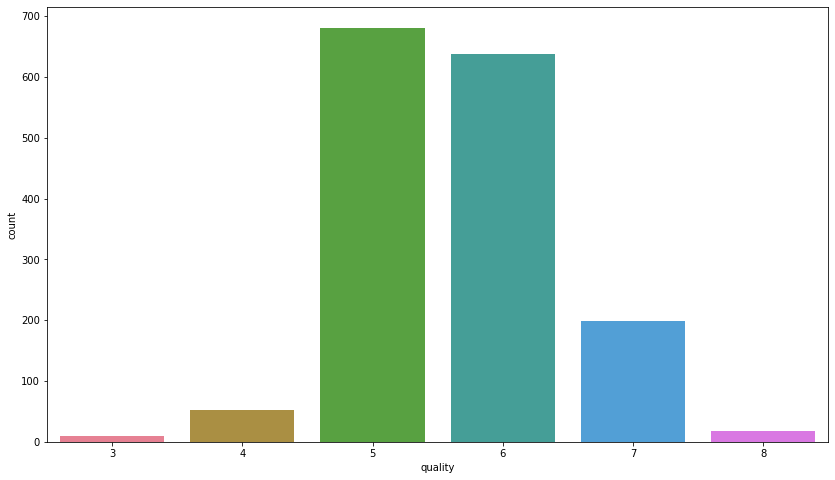

In [104]:
plt.figure(figsize = (14,8))
sns.countplot(x="quality", data = data, palette = 'husl')

In [105]:
corr = data.corr()
print(corr['quality'].sort_values(ascending = False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


# Correlation of quality w.r.t others

quality-  1.000000 

alcohol -               0.476166     This highly impacts the quality positively - If alcohol increases, quality increases

sulphates -               0.251397    The second most impacting column  - If sulphates increases, quality increases

citric acid      -       0.226373

fixed acidity        -   0.124052

residual sugar    -      0.013732

free sulfur dioxide -   -0.050656

pH       -              -0.057731

chlorides     -         -0.128907

density -               -0.174919

total sulfur dioxide  - -0.185100

volatile acidity   -    -0.390558     This has a highly negative correlation. As this decreases the quality increases

## Mapping the correlations

##### Heatmap gives the best visualisation of the correlations among the columns

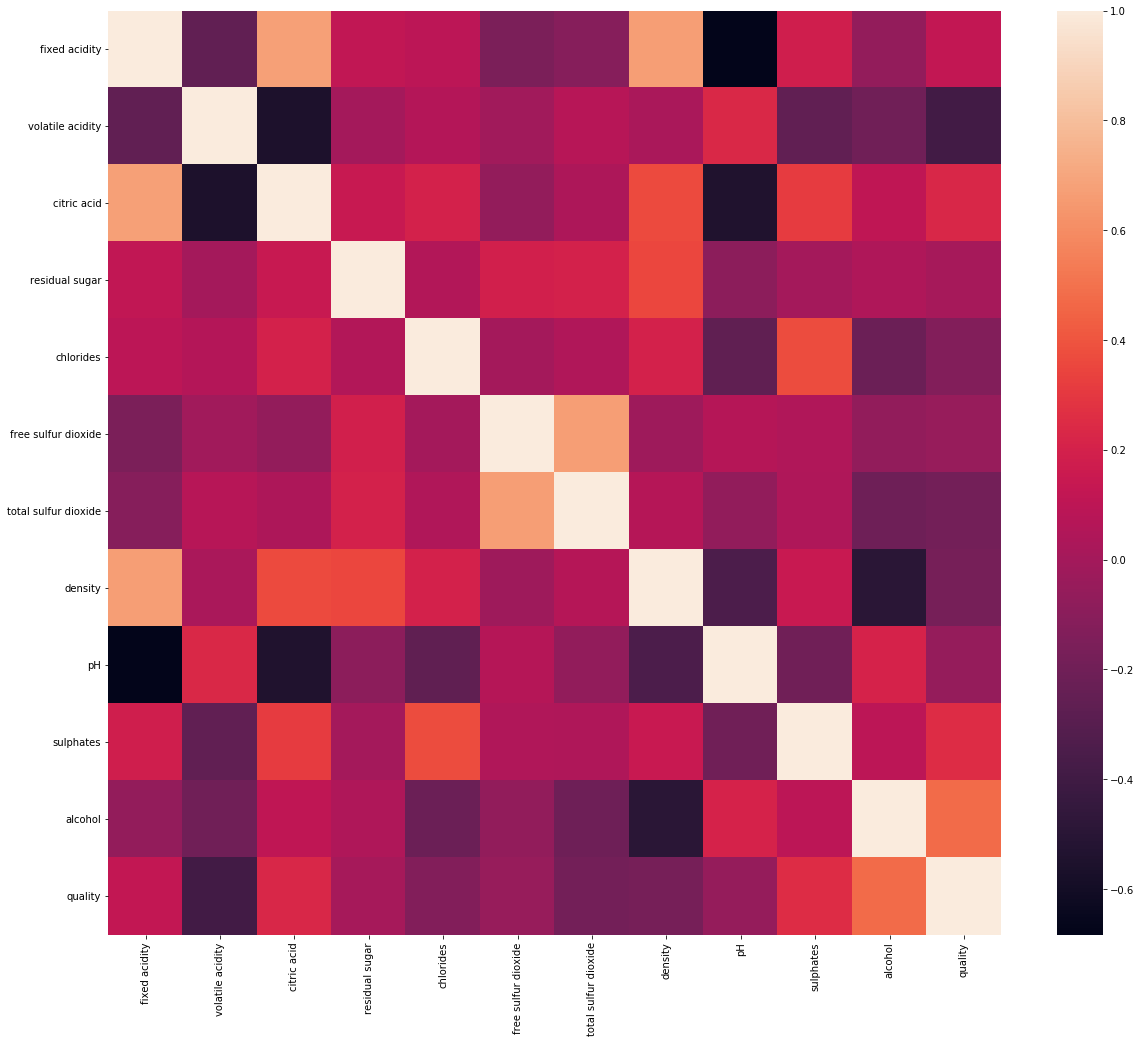

In [106]:
plt.figure(figsize=(20, 17))
sns.heatmap(data.corr(),cmap="rocket");

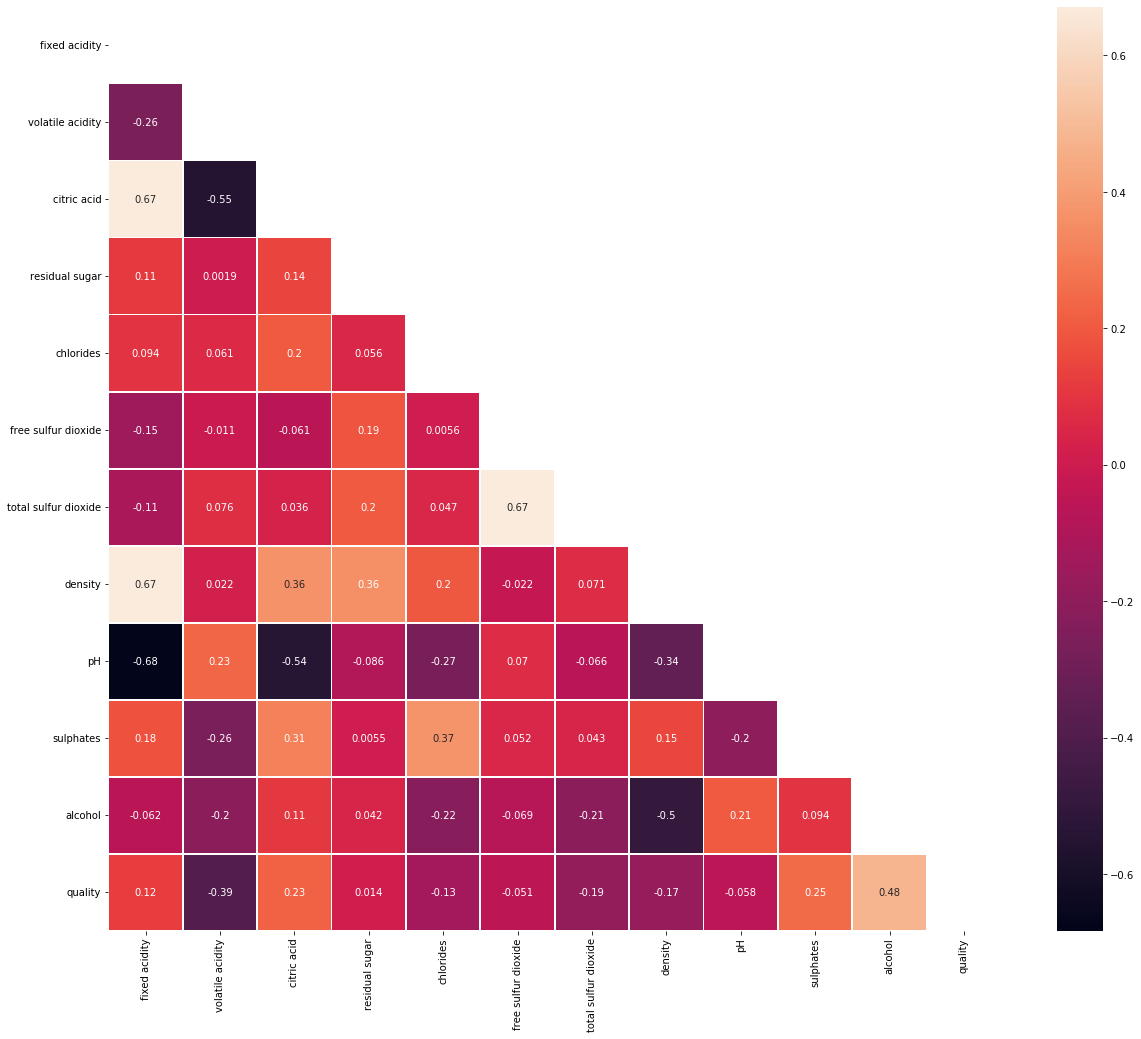

In [107]:
plt.figure(figsize=(20, 17))
matrix = np.triu(data.corr())
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket")
plt.show()

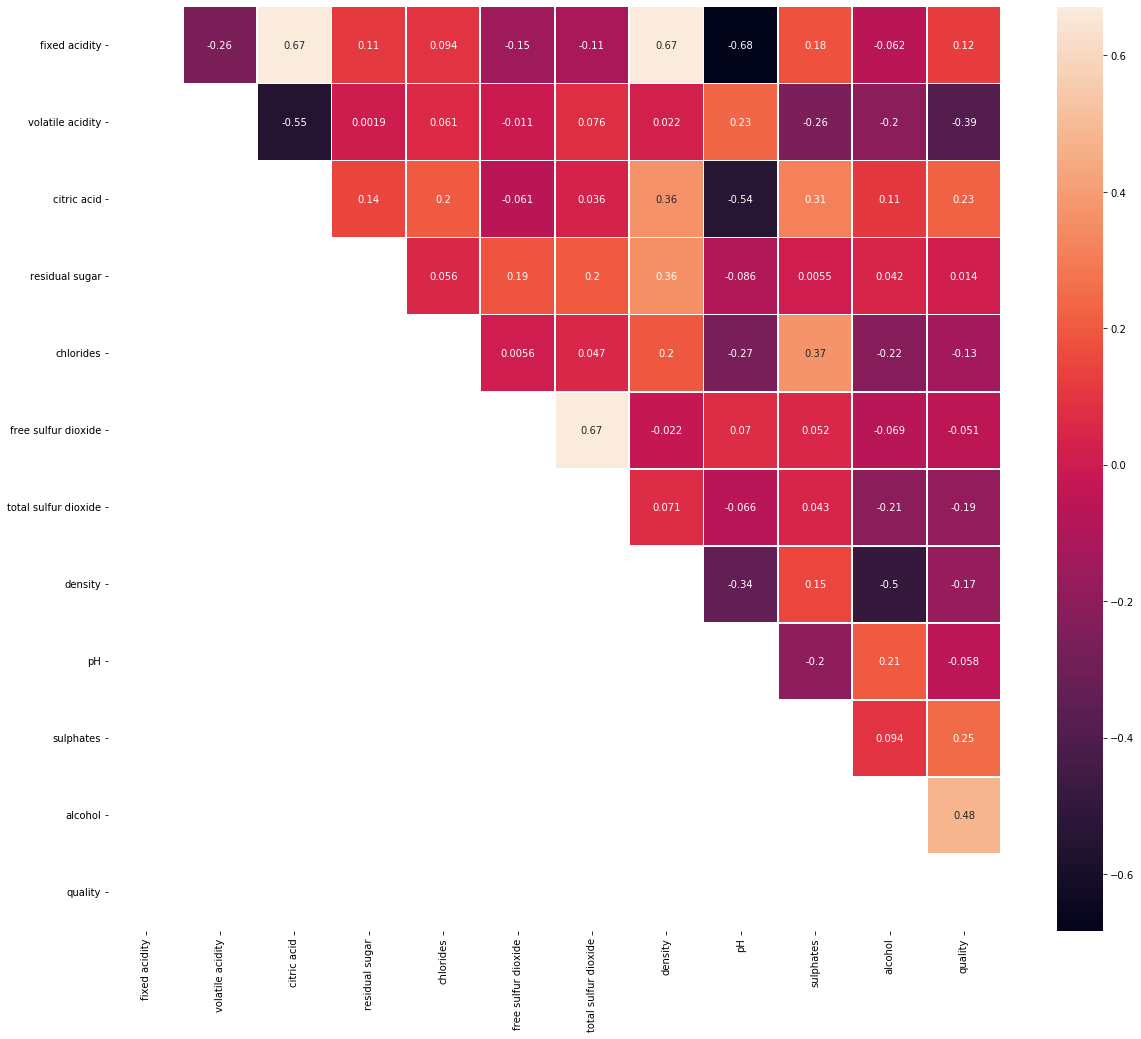

In [108]:
plt.figure(figsize=(20, 17))
matrix = np.tril(data.corr())
sns.heatmap(data.corr(), annot=True,linewidth=.8, mask=matrix, cmap="rocket")
plt.show()

In [109]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


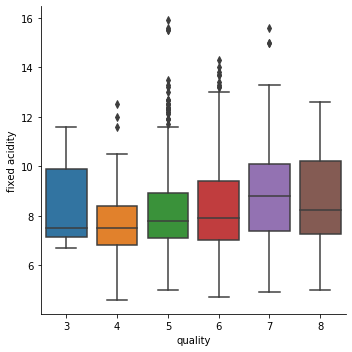

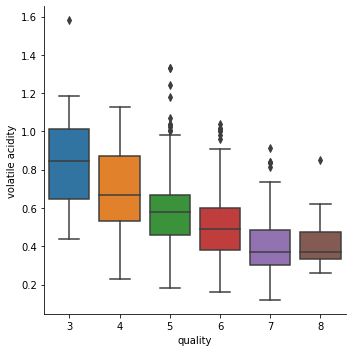

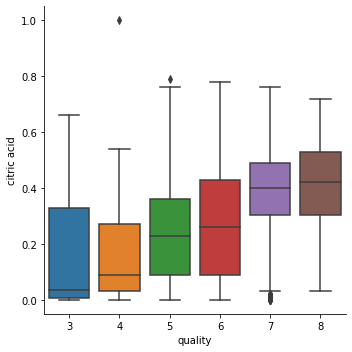

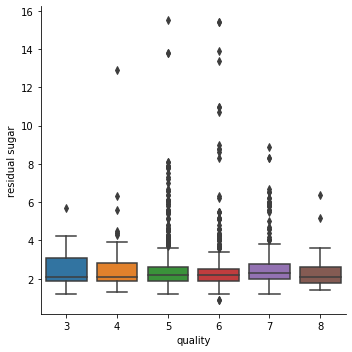

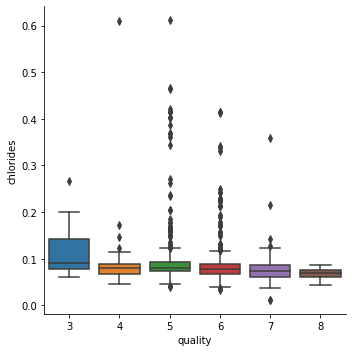

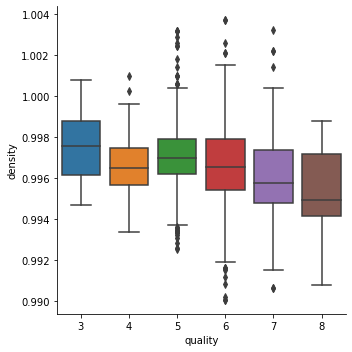

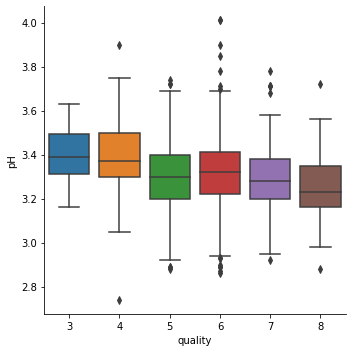

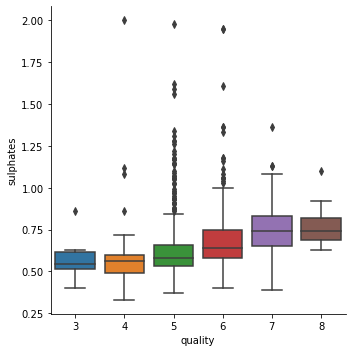

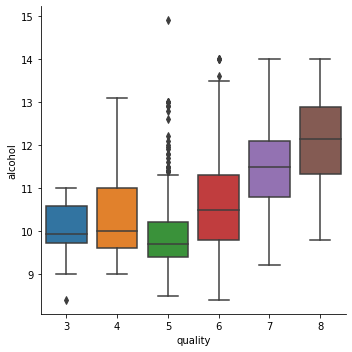

In [110]:
sns.catplot(x="quality", y="fixed acidity", data=data, kind="box")
sns.catplot(x="quality", y="volatile acidity", data=data, kind="box")
sns.catplot(x="quality", y="citric acid", data=data, kind="box")
sns.catplot(x="quality", y="residual sugar", data=data, kind="box")
sns.catplot(x="quality", y="chlorides", data=data, kind="box")
sns.catplot(x="quality", y="density", data=data, kind="box")
sns.catplot(x="quality", y="pH", data=data, kind="box")
sns.catplot(x="quality", y="sulphates", data=data, kind="box")
sns.catplot(x="quality", y="alcohol", data=data, kind="box")

In [111]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [112]:
acidity = data['fixed acidity'].value_counts().reset_index()

In [113]:
acidity.head()

,index,fixed acidity
0,7.2,67
1,7.1,57
2,7.8,53
3,7.5,52
4,7.0,50


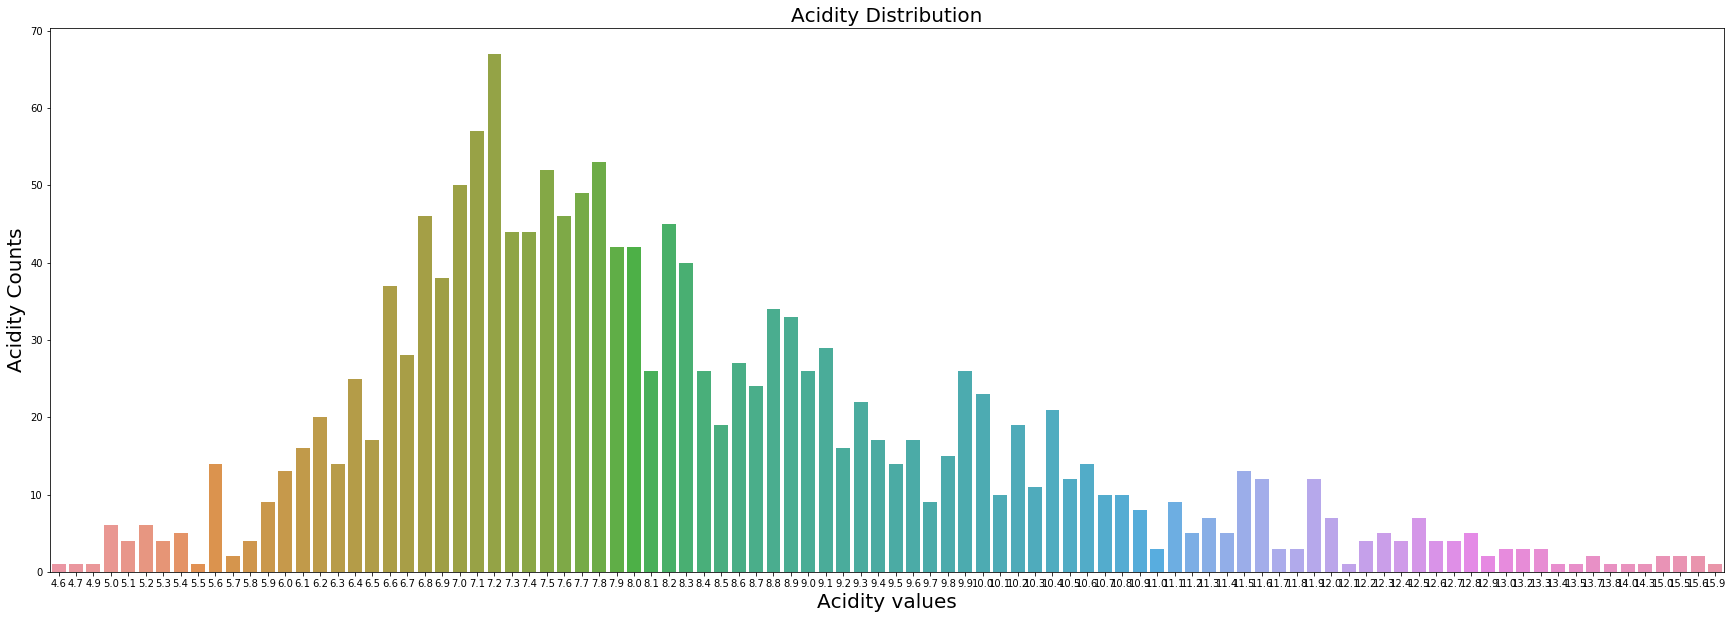

In [114]:
plt.figure(figsize=(30, 10))
sns.barplot(x=acidity["index"], y=acidity["fixed acidity"])
plt.title("Acidity Distribution", fontsize=20)
plt.xlabel("Acidity values", fontsize=20)
plt.ylabel("Acidity Counts", fontsize=20)
plt.show()

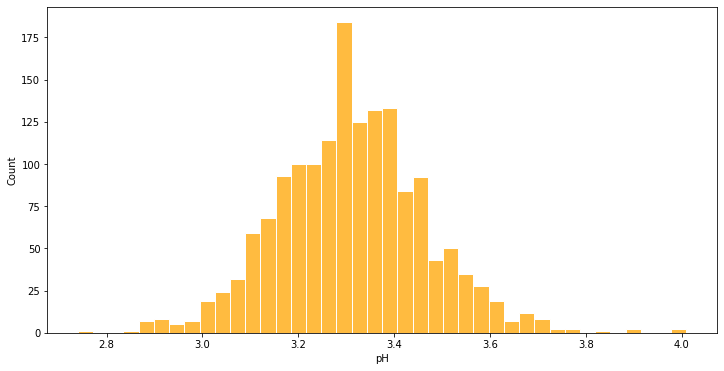

In [115]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x="pH", color = 'Orange', edgecolor = 'white')

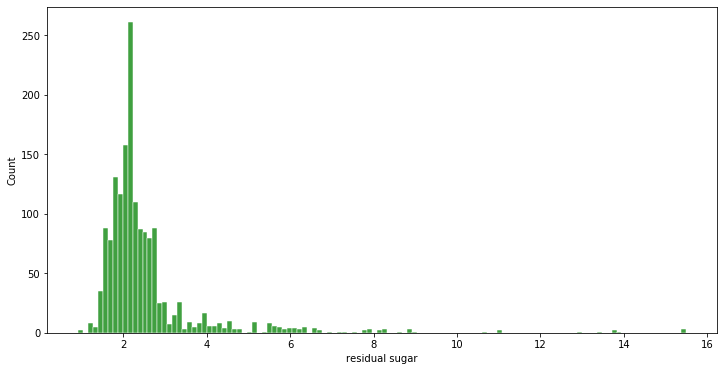

In [116]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x="residual sugar", color = 'green', edgecolor = 'white')

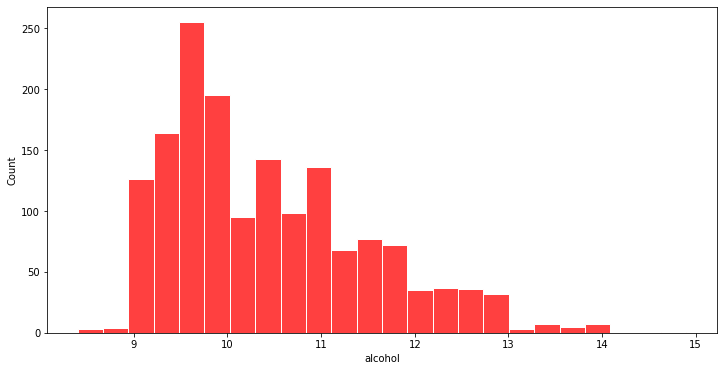

In [117]:
plt.figure(figsize=(12,6))
sns.histplot(data=data, x="alcohol", color = 'red', edgecolor = 'white')

C:\Users\Jagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jagan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

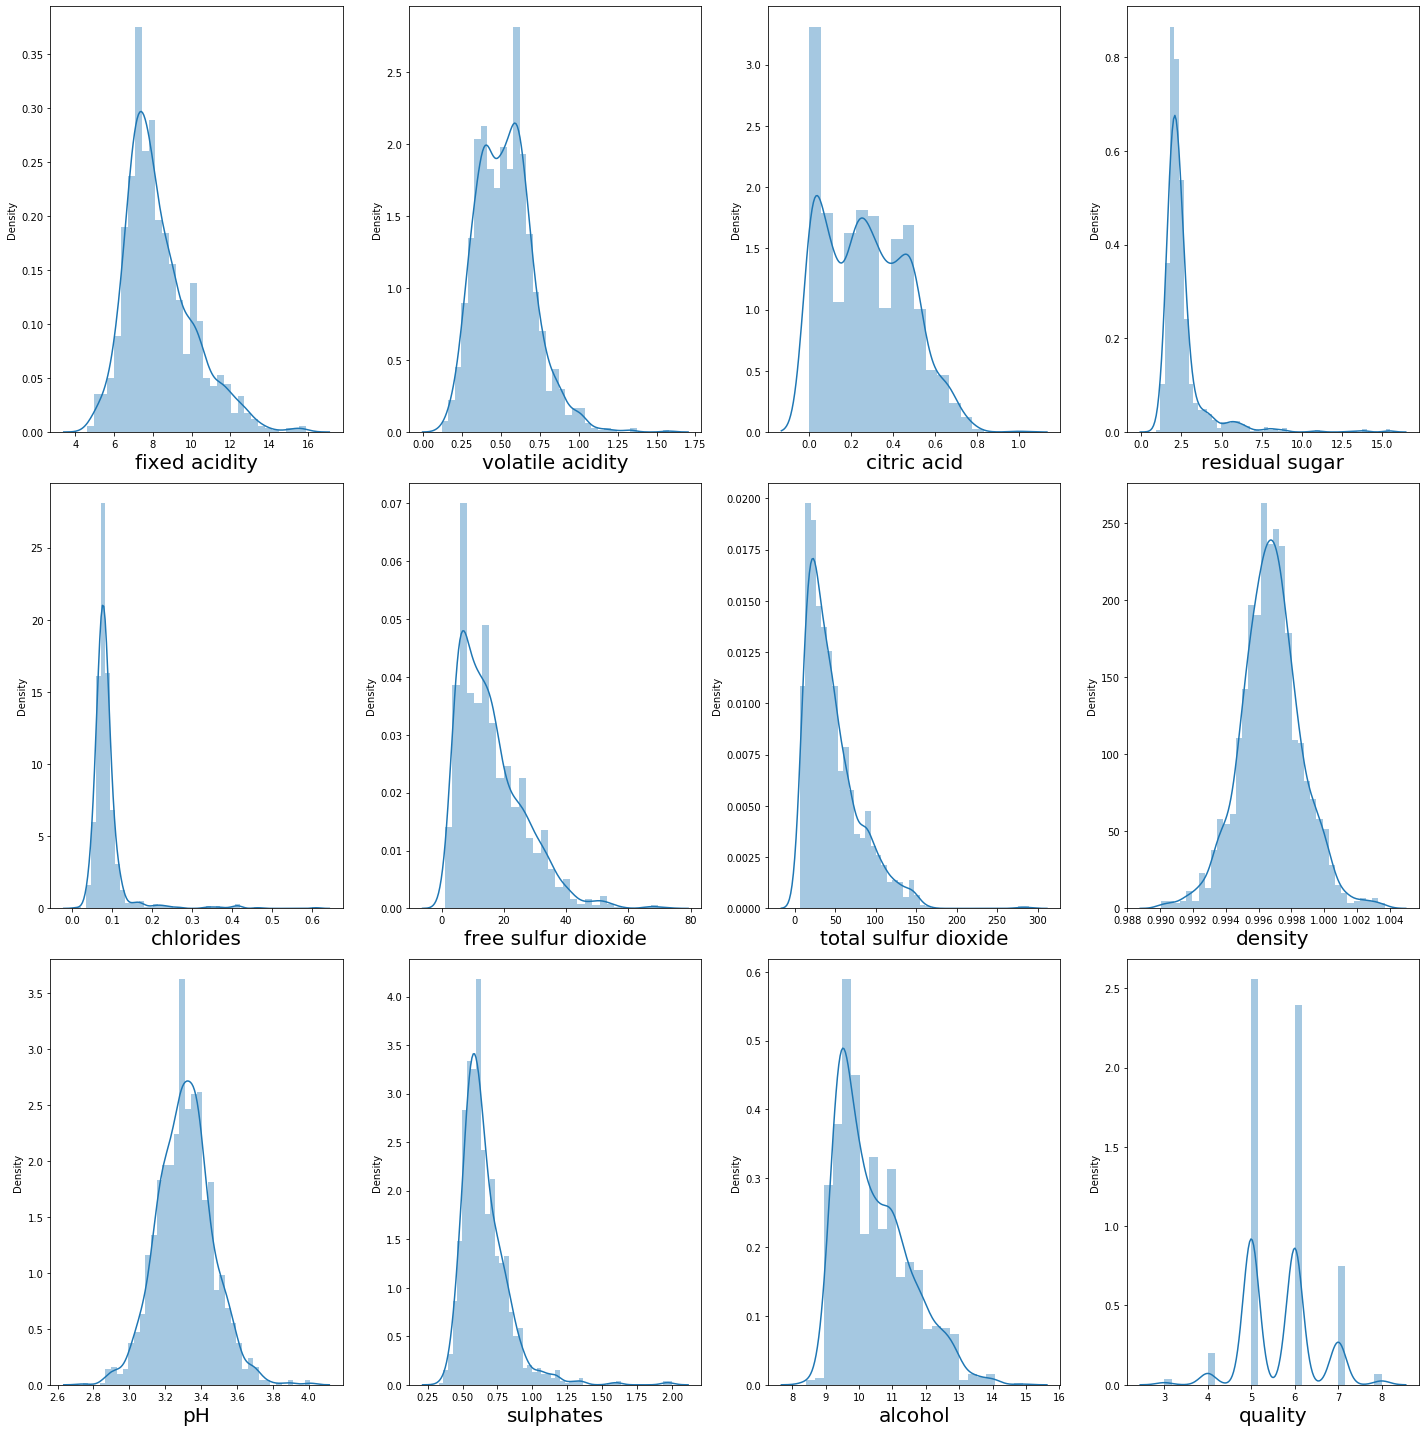

In [118]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Outlier detection formula

## higher side is  Q3 + (1.5 * IQR)

## lower side is  Q1 - (1.5 * IQR)

## IQR = q3-q1

In [119]:
def outliers_detection(columns):
    indexes =[]
    for column in columns:
        Q1 = np.percentile(data[column],25)
        Q3 = np.percentile(data[column],75)
        IQR = Q3 - Q1
        out_cal = 1.5 * IQR
        outlier_columns = data[(data[column] > Q3 + out_cal) | (data[column] < Q1 - out_cal)].index
        indexes.extend(outlier_columns)
    outlier_indices = Counter(indexes)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5)

    return multiple_outliers

In [120]:
data = data.drop(outliers_detection(data.columns[:-1]),axis = 0).reset_index(drop = True)

In [121]:
data.shape

(1479, 12)

In [122]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [123]:
X = data.iloc[:, 0:-1].values
y = data.iloc[:, -1].values

In [124]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

## Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [127]:
y_test

array([5, 4, 6, 6, 5, 5, 5, 5, 6, 5, 5, 7, 6, 6, 6, 7, 6, 4, 6, 5, 5, 8,
       6, 6, 5, 6, 6, 6, 5, 5, 4, 5, 6, 7, 5, 7, 5, 6, 7, 6, 6, 7, 5, 6,
       5, 7, 5, 5, 7, 5, 5, 5, 5, 5, 7, 6, 7, 5, 5, 5, 7, 6, 7, 6, 6, 5,
       5, 6, 6, 7, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 5, 7, 7, 4, 5, 5, 6, 5, 6, 5, 5, 5, 5, 4, 6, 6, 7, 5, 6,
       5, 7, 6, 5, 5, 6, 5, 7, 6, 5, 4, 4, 5, 6, 6, 5, 6, 5, 6, 8, 6, 5,
       6, 6, 6, 5, 5, 7, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 5,
       6, 6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 7, 5, 7,
       5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 7, 7, 5, 6, 5, 5, 6, 5, 5, 5,
       7, 5, 5, 5, 6, 7, 5, 5, 6, 6, 5, 6, 5, 6, 6, 4, 6, 7, 5, 6, 6, 5,
       6, 4, 6, 6, 6, 5, 6, 7, 6, 6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 7,
       5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 4, 4, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 7, 6, 7, 5, 5, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 7, 6, 6, 5, 5, 6, 5], dtype=int64)

In [128]:
y_pred = log_reg.predict(X_test)

In [129]:
y_pred

array([5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 7, 5, 6, 6, 7, 5, 6, 5, 5, 5, 6,
       5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6, 5, 6,
       5, 7, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 7, 5, 6, 5, 6, 7, 6, 7, 5, 5,
       5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 5, 6, 5, 6, 5, 6, 5, 7,
       5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 7, 7, 5, 6,
       5, 6, 5, 5, 5, 7, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       5, 5, 6, 5, 5, 7, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 5, 5,
       6, 6, 5, 6, 5, 7, 6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 5,
       5, 5, 6, 7, 6, 5, 6, 7, 5, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6,
       6, 6, 5, 6, 4, 5, 6, 6, 7, 5, 5, 6, 6, 6, 7, 6, 6, 4, 6, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6, 5,
       6, 6, 7, 6, 6, 5, 5, 6, 6, 6], dtype=int64)

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


In [131]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5777027027027027

In [132]:
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[ 1,  8,  2,  0,  0],
       [ 1, 93, 30,  0,  0],
       [ 0, 42, 68, 16,  0],
       [ 0,  1, 23,  9,  0],
       [ 0,  0,  1,  1,  0]], dtype=int64)

In [133]:
accuracy_scores = {}
def predictor(predictor, params):
    global accuracy_scores
    if predictor == 'lr':
        print('Training Logistic Regression on Training Set')
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(**params)

    elif predictor == 'svm':
        print('Training Support Vector Machine on Training Set')
        from sklearn.svm import SVC
        classifier = SVC(**params)

    elif predictor == 'knn':
        print('Training K-Nearest Neighbours on Training Set')
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(**params)

    elif predictor == 'dt':
        print('Training Decision Tree Classifier on Training Set')
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(**params)

    elif predictor == 'nb':
        print('Training Naive Bayes Classifier on Training Set')
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB(**params)

    elif predictor == 'rfc':
        print('Training Random Forest Classifier on Training Set')
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(**params)

    classifier.fit(X_train, y_train)

    print('''Predicting Single Cell Result''')
    single_predict = classifier.predict(scaler.transform([[
        7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4
    ]]))
    if single_predict > 0 :
        print('High Quality Wine')
    else:
        print('Low Quality Wine')
    print('''Prediciting Test Set Result''')
    y_pred = classifier.predict(X_test)
    
    result = np.concatenate((y_pred.reshape(len(y_pred), 1),
                             y_test.reshape(len(y_test), 1)),1)
    print(result, '\n')
    print('''Making Confusion Matrix''')
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    y_pred = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm, '\n')
    plot_confusion_matrix(classifier, X_test, y_test, cmap="pink")
    print('True Positives :', cm[0][0])
    print('False Positives :', cm[0][1])
    print('False Negatives :', cm[1][0])
    print('True Negatives :', cm[0][1], '\n')

    print('''Classification Report''')
    print(classification_report(y_test, y_pred,
          target_names=['0', '1'], zero_division=1))

    print('''Evaluating Model Performance''')
    accuracy = accuracy_score(y_test, y_pred)
    print(accuracy, '\n')

    print('''Applying K-Fold Cross validation''')
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(
        estimator=classifier, X=X_train, y=y_train, cv=10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    accuracy_scores[classifier] = accuracies.mean()*100
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100), '\n')

In [134]:
predictor('lr', {'penalty': 'l1', 'solver': 'liblinear'})

Training Logistic Regression on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[5 5]
 [5 4]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 5]
 [5 5]
 [7 7]
 [5 6]
 [6 6]
 [6 6]
 [7 7]
 [5 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [6 8]
 [5 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [6 5]
 [5 4]
 [5 5]
 [5 6]
 [6 7]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [6 7]
 [6 6]
 [5 6]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [7 7]
 [6 5]
 [6 5]
 [6 7]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [6 6]
 [6 7]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [6 6]
 [5 7]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 7]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 6]
 [7 6]
 [5 6]
 [6 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [7 6]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [6 7]
 [6 7]
 [5 4]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 5]
 [5 4]
 [5 6]
 [6 6]
 [7 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 4]
 [5 4]
 [6 5]
 [6 6]
 [5 6]
 [5 

NameError: name 'plot_confusion_matrix' is not defined

In [135]:
predictor('svm', {'C': .5, 'gamma': 0.8,
          'kernel': 'linear', 'random_state': 0})

Training Support Vector Machine on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[5 5]
 [5 4]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [5 6]
 [6 5]
 [6 5]
 [7 7]
 [5 6]
 [6 6]
 [6 6]
 [7 7]
 [5 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [6 8]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [5 6]
 [5 5]
 [5 5]
 [5 4]
 [5 5]
 [6 6]
 [6 7]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [6 7]
 [6 6]
 [5 6]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [7 7]
 [6 5]
 [6 5]
 [6 7]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [6 6]
 [7 7]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [7 6]
 [6 7]
 [7 6]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 7]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 6]
 [7 6]
 [5 6]
 [6 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [7 6]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [6 7]
 [6 7]
 [5 4]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 5]
 [5 4]
 [5 6]
 [7 6]
 [7 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 4]
 [5 4]
 [6 5]
 [6 6]
 [5 6]
 

NameError: name 'plot_confusion_matrix' is not defined

In [136]:
predictor('svm', {'C': .25, 'gamma': 0.1, 'kernel': 'rbf', 'random_state': 0})


Training Support Vector Machine on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[5 5]
 [5 4]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [5 6]
 [6 5]
 [6 5]
 [6 7]
 [5 6]
 [6 6]
 [6 6]
 [6 7]
 [5 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [6 8]
 [5 6]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [5 6]
 [5 5]
 [5 5]
 [5 4]
 [5 5]
 [5 6]
 [6 7]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [6 7]
 [6 6]
 [5 6]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [7 7]
 [6 5]
 [6 5]
 [6 7]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [6 6]
 [6 7]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [6 6]
 [5 7]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 7]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [5 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [6 6]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [6 7]
 [6 7]
 [5 4]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 5]
 [5 4]
 [6 6]
 [6 6]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [6 5]
 [5 4]
 [5 4]
 [6 5]
 [6 6]
 [6 6]
 

NameError: name 'plot_confusion_matrix' is not defined

In [137]:
predictor('knn', {'algorithm': 'auto', 'n_jobs': 1,
          'n_neighbors': 8, 'weights': 'distance'})

Training K-Nearest Neighbours on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[5 5]
 [5 4]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [6 6]
 [6 5]
 [6 5]
 [7 7]
 [6 6]
 [6 6]
 [6 6]
 [7 7]
 [6 6]
 [6 4]
 [6 6]
 [5 5]
 [5 5]
 [6 8]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [6 4]
 [5 5]
 [5 6]
 [5 7]
 [5 5]
 [7 7]
 [6 5]
 [5 6]
 [7 7]
 [6 6]
 [5 6]
 [7 7]
 [5 5]
 [7 6]
 [5 5]
 [7 7]
 [7 5]
 [6 5]
 [7 7]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [7 7]
 [6 6]
 [6 7]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [7 6]
 [5 7]
 [7 6]
 [6 6]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [6 7]
 [5 6]
 [6 6]
 [6 6]
 [7 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [6 6]
 [5 5]
 [6 5]
 [5 6]
 [5 5]
 [7 7]
 [5 7]
 [6 4]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 5]
 [5 5]
 [6 5]
 [5 4]
 [6 6]
 [6 6]
 [7 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 7]
 [5 6]
 [5 5]
 [5 4]
 [6 4]
 [6 5]
 [6 6]
 [5 6]
 [5

NameError: name 'plot_confusion_matrix' is not defined

In [138]:
predictor('dt', {'criterion': 'entropy', 'max_features': 'auto',
          'splitter': 'best', 'random_state': 0})

Training Decision Tree Classifier on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[5 5]
 [5 4]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [5 6]
 [6 5]
 [6 5]
 [5 7]
 [6 6]
 [6 6]
 [6 6]
 [6 7]
 [6 6]
 [3 4]
 [5 6]
 [5 5]
 [5 5]
 [6 8]
 [6 6]
 [6 6]
 [5 5]
 [7 6]
 [5 6]
 [6 6]
 [5 5]
 [6 5]
 [6 4]
 [5 5]
 [5 6]
 [5 7]
 [5 5]
 [7 7]
 [6 5]
 [7 6]
 [7 7]
 [6 6]
 [6 6]
 [6 7]
 [6 5]
 [5 6]
 [6 5]
 [7 7]
 [7 5]
 [5 5]
 [7 7]
 [6 5]
 [5 5]
 [5 5]
 [7 5]
 [6 5]
 [6 7]
 [5 6]
 [6 7]
 [5 5]
 [6 5]
 [5 5]
 [7 7]
 [6 6]
 [6 7]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [5 6]
 [6 6]
 [6 7]
 [5 6]
 [6 6]
 [5 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [5 6]
 [6 6]
 [6 6]
 [4 6]
 [6 5]
 [5 5]
 [7 6]
 [5 5]
 [7 6]
 [5 6]
 [7 6]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [7 7]
 [7 7]
 [5 4]
 [5 5]
 [6 5]
 [4 6]
 [5 5]
 [6 6]
 [5 5]
 [7 5]
 [5 5]
 [7 5]
 [5 4]
 [5 6]
 [6 6]
 [6 7]
 [5 5]
 [7 6]
 [5 5]
 [5 7]
 [6 6]
 [6 5]
 [5 5]
 [6 6]
 [5 5]
 [7 7]
 [5 6]
 [6 5]
 [6 4]
 [5 4]
 [7 5]
 [6 6]
 [7 6]

NameError: name 'plot_confusion_matrix' is not defined

In [139]:
predictor('nb', {})

Training Naive Bayes Classifier on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[5 5]
 [5 4]
 [6 6]
 [5 6]
 [4 5]
 [4 5]
 [6 5]
 [5 5]
 [5 6]
 [6 5]
 [5 5]
 [7 7]
 [6 6]
 [6 6]
 [6 6]
 [7 7]
 [5 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [7 8]
 [5 6]
 [7 6]
 [5 5]
 [6 6]
 [4 6]
 [5 6]
 [5 5]
 [5 5]
 [4 4]
 [5 5]
 [5 6]
 [7 7]
 [5 5]
 [7 7]
 [6 5]
 [4 6]
 [8 7]
 [7 6]
 [5 6]
 [7 7]
 [4 5]
 [7 6]
 [5 5]
 [7 7]
 [7 5]
 [6 5]
 [6 7]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [7 7]
 [6 6]
 [7 7]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [7 6]
 [5 7]
 [7 6]
 [5 6]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [7 7]
 [5 6]
 [5 6]
 [5 6]
 [7 6]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [5 6]
 [7 6]
 [4 6]
 [7 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [7 6]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [6 7]
 [6 7]
 [5 4]
 [5 5]
 [5 5]
 [4 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 5]
 [4 4]
 [3 6]
 [7 6]
 [7 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 4]
 [5 4]
 [6 5]
 [6 6]
 [5 6]
 

NameError: name 'plot_confusion_matrix' is not defined

In [140]:
predictor('rfc', {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100,'random_state':0})

Training Random Forest Classifier on Training Set
Predicting Single Cell Result
High Quality Wine
Prediciting Test Set Result
[[5 5]
 [6 4]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [6 5]
 [5 5]
 [5 6]
 [6 5]
 [5 5]
 [7 7]
 [6 6]
 [6 6]
 [6 6]
 [7 7]
 [6 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [6 8]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [6 4]
 [5 5]
 [5 6]
 [6 7]
 [5 5]
 [7 7]
 [6 5]
 [6 6]
 [7 7]
 [6 6]
 [5 6]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [7 7]
 [7 5]
 [6 5]
 [7 7]
 [5 5]
 [5 5]
 [5 5]
 [6 5]
 [6 5]
 [7 7]
 [6 6]
 [6 7]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [7 6]
 [5 7]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [6 7]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [4 6]
 [6 5]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 6]
 [6 6]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [7 7]
 [6 7]
 [5 4]
 [5 5]
 [5 5]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 5]
 [5 4]
 [5 6]
 [6 6]
 [7 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 6]
 [5 5]
 [5 4]
 [6 4]
 [6 5]
 [6 6]
 [5 6]

NameError: name 'plot_confusion_matrix' is not defined

In [142]:
plt.figure(figsize=(12, 6))
model_accuracies = list(accuracy_scores.values())
model_names = ['LogisticRegression', 'SVC',
               'K-SVC', 'KNN', 'Decisiontree', 'GaussianNB', 'RandomForest']
sns.barplot(x=model_accuracies, y=model_names, palette='mako');

KeyError: 'LogisticRegression'

<Figure size 864x432 with 0 Axes>